In [1]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def read_and_clean_data(filename):
    df = pd.read_csv(filename, parse_dates = ['time'])
    #df = df[['XRP_price', 'vader_int', 'pos','neu','neg','total']]
    
    df["pospercent"] = df.pos / df.total
    df["neupercent"] = df.neu / df.total
    df["negpercent"] = df.neg / df.total
    
    df.vader_int = df.vader_int.astype(int)
    df.pos = df.pos.astype(int)
    df.neu = df.neu.astype(int)
    df.neg = df.neg.astype(int)
    df.total = df.total.astype(int)
    
    df["BTC_change"] = (df.BTC_price - df.BTC_price.shift(1))
    df["SPY_change"] = (df.SPY_price - df.SPY_price.shift(1))
    df["VXX_change"] = (df.VXX_price - df.VXX_price.shift(1))
    df["XAU_change"] = (df.XAU_price - df.XAU_price.shift(1))
    
    df["change"] = (df.XRP_price - df.XRP_price.shift(-1)).shift(1)

    df = df.drop(['XRP_price','BTC_price','SPY_price','VXX_price','XAU_price','total','pos','neg','neu','time','vader_int','neupercent'], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop = True)
    return df

## Day

In [29]:
day = read_and_clean_data("data/full_day.csv")
day_train, day_test = train_test_split(day, test_size = 0.25, random_state = 42)
day_train, day_test = day_train.reset_index(drop = True), day_test.reset_index(drop = True)

day.head(5)

,dom,pospercent,negpercent,BTC_change,SPY_change,VXX_change,XAU_change,change
0,Neutral,0.402827,0.183746,-703.00,-0.9075,-0.2600,2.46825,0.00015
1,Positive,0.431818,0.151515,156.75,0.0000,0.0000,-1.27750,-0.00020
2,Positive,0.458015,0.160305,67.75,-2.0350,0.2000,3.14575,0.00015
3,Positive,0.423611,0.215278,437.50,3.4050,-0.7550,12.81750,0.00015
4,Positive,0.448276,0.172414,1042.75,3.8450,-0.6375,12.03250,0.00005


In [30]:
daysetup = setup(data = day_train, target = 'change', silent = True)

,Description,Value
0,session_id,4505
1,Target,change
2,Original Data,"(39, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(27, 7)"


In [31]:
best_model_day = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0002,0.0000,0.0002,-2.5311,0.0002,1.5193,0.6200
br,Bayesian Ridge,0.0002,0.0000,0.0002,-1.9356,0.0002,1.4757,0.0140
lasso,Lasso Regression,0.0002,0.0000,0.0002,-1.0411,0.0002,1.2685,0.0120
ridge,Ridge Regression,0.0002,0.0000,0.0002,-1.8699,0.0002,1.4741,0.0120
en,Elastic Net,0.0002,0.0000,0.0002,-1.0411,0.0002,1.2685,0.0170
lar,Least Angle Regression,0.0002,0.0000,0.0002,-2.6438,0.0002,1.5710,0.0130
llar,Lasso Least Angle Regression,0.0002,0.0000,0.0002,-1.0411,0.0002,1.2685,0.0120
omp,Orthogonal Matching Pursuit,0.0002,0.0000,0.0002,-1.0411,0.0002,1.2685,0.0120
par,Passive Aggressive Regressor,0.0002,0.0000,0.0002,-0.9096,0.0002,1.0000,0.0420
gbr,Gradient Boosting Regressor,0.0002,0.0000,0.0002,-3.2629,0.0002,1.6027,0.0200


In [32]:
pred = predict_model(best_model_day, data=day_test)
pred = pred.rename({'change':'real', 'Label':'pred'}, axis = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0003,0.0000,0.0003,-0.8649,0.0002,1.2326


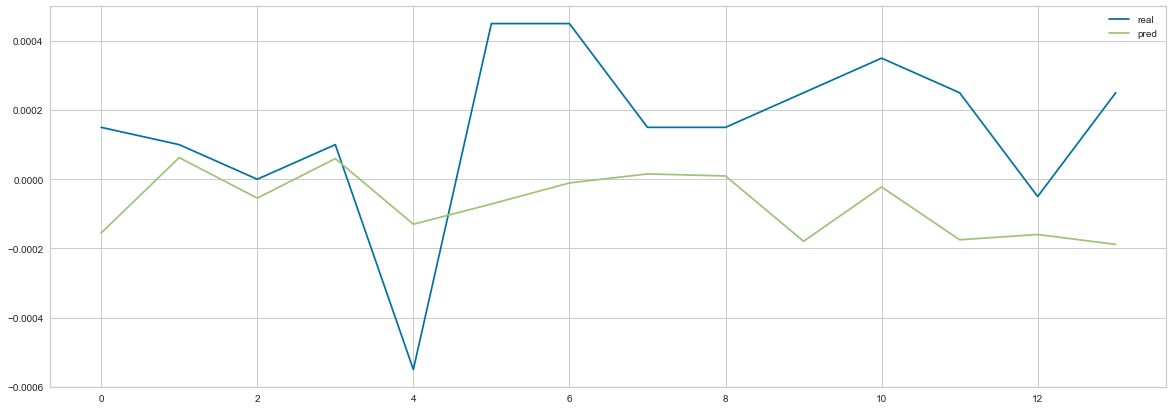

In [33]:
ax = pred[['real', 'pred']].plot(figsize = (20, 7))
fig = ax.get_figure()
fig.savefig('images/day_pycaret_pred.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
fig.savefig('images/day_pycaret_pred.jpg', format = "jpg", dpi = 300,bbox_inches='tight')

In [34]:
plot_model(best_model_day, plot = 'residuals', save = True)

'Residuals.png'

In [35]:
plot_model(best_model_hour, plot = 'feature', save = True)

'Feature Importance.png'

## Hour

In [36]:
hour = read_and_clean_data("data/full_hour.csv")
hour_train, hour_test = train_test_split(hour, test_size = 0.25, random_state = 42)
hour_train, hour_test = hour_train.reset_index(drop = True), hour_test.reset_index(drop = True)

hour.head(5)

,dom,pospercent,negpercent,BTC_change,SPY_change,VXX_change,XAU_change,change
0,Positive,0.333333,0.333333,7.00,0.0,0.0,-0.17575,-0.00020
1,Positive,0.600000,0.000000,-601.00,0.0,0.0,1.05325,0.00350
2,Neutral,0.238095,0.190476,-548.75,0.0,0.0,0.48325,0.00440
3,Positive,0.545455,0.181818,19.50,0.0,0.0,-1.01825,-0.00495
4,Positive,0.750000,0.000000,-91.50,0.0,0.0,-1.34650,-0.01245


In [37]:
hoursetup = setup(data = hour_train, target = 'change', silent = True)

,Description,Value
0,session_id,7036
1,Target,change
2,Original Data,"(926, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(648, 9)"


In [38]:
best_model_hour = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0035,0.0000,0.0051,-0.0347,0.0047,1.2684,0.0100
lar,Least Angle Regression,0.0035,0.0000,0.0051,-0.0388,0.0047,1.2927,0.0100
ridge,Ridge Regression,0.0035,0.0000,0.0051,-0.0348,0.0047,1.2375,0.0090
en,Elastic Net,0.0035,0.0000,0.0051,-0.0299,0.0050,1.0066,0.0120
par,Passive Aggressive Regressor,0.0035,0.0000,0.0051,-0.0238,0.0051,1.0000,0.0140
lasso,Lasso Regression,0.0035,0.0000,0.0051,-0.0299,0.0050,1.0066,0.0100
omp,Orthogonal Matching Pursuit,0.0035,0.0000,0.0051,-0.0450,0.0049,1.1363,0.0090
br,Bayesian Ridge,0.0035,0.0000,0.0051,-0.0383,0.0048,1.1506,0.0150
huber,Huber Regressor,0.0035,0.0000,0.0051,-0.0289,0.0048,1.1153,0.0270
llar,Lasso Least Angle Regression,0.0035,0.0000,0.0051,-0.0299,0.0050,1.0066,0.0090


In [39]:
pred = predict_model(best_model_hour, data=hour_test)
pred = pred.rename({'change':'real', 'Label':'pred'}, axis = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0039,0.0000,0.0055,-0.0170,0.0051,1.1586


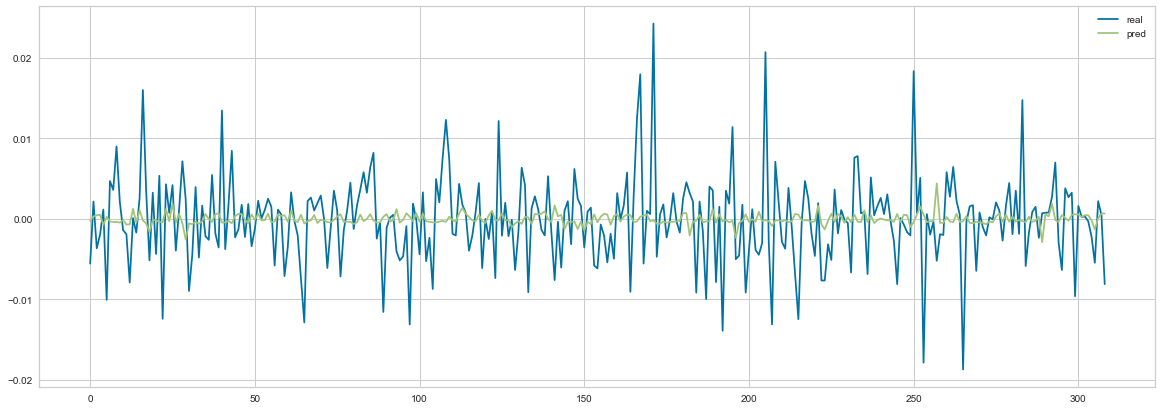

In [40]:
ax = pred[['real', 'pred']].plot(figsize = (20, 7))
fig = ax.get_figure()
fig.savefig('images/hour_pycaret_pred.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
fig.savefig('images/hour_pycaret_pred.jpg', format = "jpg", dpi = 300,bbox_inches='tight')

In [41]:
plot_model(best_model_hour, plot = 'residuals', save = True)

'Residuals.png'

In [42]:
plot_model(best_model_hour, plot = 'feature', save = True)

'Feature Importance.png'

## Minute

In [43]:
minute = read_and_clean_data("data/full_minute.csv")
minute_train, minute_test = train_test_split(minute, test_size = 0.25, random_state = 42)
minute_train, minute_test = minute_train.reset_index(drop = True), minute_test.reset_index(drop = True)

minute.head(5)

,dom,pospercent,negpercent,BTC_change,SPY_change,VXX_change,XAU_change,change
0,Positive,1.0,0.0,-16.00,0.0,0.0,0.03750,0.00015
1,Negative,0.0,1.0,-38.25,0.0,0.0,-0.09250,-0.00020
2,Negative,0.0,1.0,-17.00,0.0,0.0,0.13200,0.00060
3,Neutral,0.0,0.0,11.25,0.0,0.0,-0.00725,0.00000
4,Negative,0.0,1.0,-3.50,0.0,0.0,0.14675,-0.00050


In [44]:
minutesetup = setup(data = minute_train, target = 'change', silent = True)

,Description,Value
0,session_id,8012
1,Target,change
2,Original Data,"(6881, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4816, 9)"


In [45]:
best_model_minute = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0004,0.0000,0.0007,-0.0031,0.0006,166154949.9032,0.0110
llar,Lasso Least Angle Regression,0.0004,0.0000,0.0007,-0.0015,0.0007,134405214.5166,0.0110
lasso,Lasso Regression,0.0004,0.0000,0.0007,-0.0015,0.0007,134405211.9004,0.0090
en,Elastic Net,0.0004,0.0000,0.0007,-0.0015,0.0007,134405211.9004,0.0140
lar,Least Angle Regression,0.0004,0.0000,0.0007,-0.0018,0.0007,110740953.7527,0.0110
ridge,Ridge Regression,0.0004,0.0000,0.0007,-0.0030,0.0006,151597163.5022,0.0110
omp,Orthogonal Matching Pursuit,0.0004,0.0000,0.0007,-0.0022,0.0006,87517134.1531,0.0140
br,Bayesian Ridge,0.0004,0.0000,0.0007,-0.0030,0.0006,153085122.9250,0.0110
huber,Huber Regressor,0.0004,0.0000,0.0007,-0.0028,0.0006,175635289.1719,0.0580
gbr,Gradient Boosting Regressor,0.0004,0.0000,0.0007,-0.0178,0.0006,2332689456.0805,0.1480


In [46]:
pred = predict_model(best_model_minute, data=minute_test)
pred = pred.rename({'change':'real', 'Label':'pred'}, axis = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0004,0.0000,0.0007,-0.0022,0.0007,312837653.2528


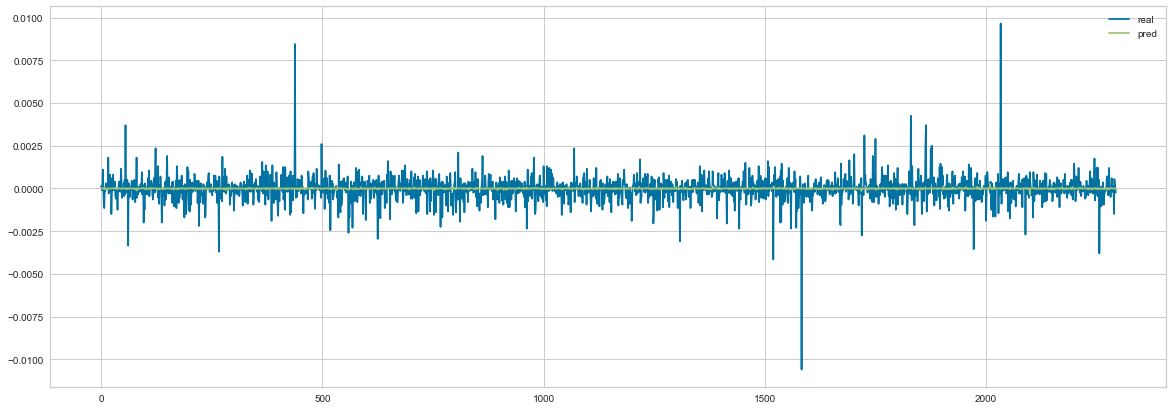

In [47]:
ax = pred[['real', 'pred']].plot(figsize = (20, 7))
fig = ax.get_figure()
fig.savefig('images/minute_pycaret_pred.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
fig.savefig('images/minute_pycaret_pred.jpg', format = "jpg", dpi = 300,bbox_inches='tight')

In [48]:
plot_model(best_model_hour, plot = 'residuals', save = True)

'Residuals.png'

In [49]:
plot_model(best_model_hour, plot = 'feature', save = True)

'Feature Importance.png'